<a href="https://colab.research.google.com/github/VctrEman/Clustering/blob/main/Clustering_for_Iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#scipy toolkit
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [2]:
iris_data=load_iris()
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)

       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count         150.000000        150.000000         150.000000        150.000000
mean            5.843333          3.057333           3.758000          1.199333
std             0.828066          0.435866           1.765298          0.762238
min             4.300000          2.000000           1.000000          0.100000
25%             5.100000          2.800000           1.600000          0.300000
50%             5.800000          3.000000           4.350000          1.300000
75%             6.400000          3.300000           5.100000          1.800000
max             7.900000          4.400000           6.900000          2.500000


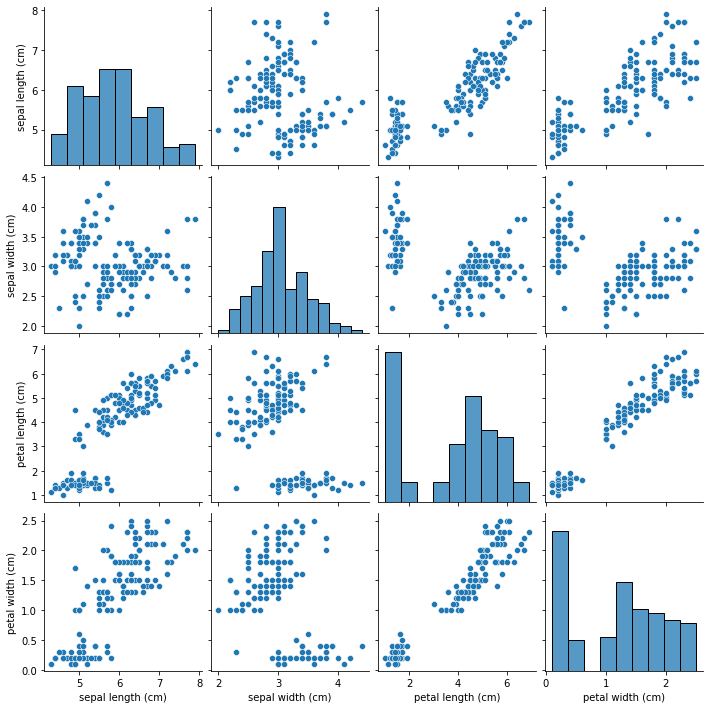

In [3]:
print(iris_df.describe())
sns.pairplot(iris_df)

Text(0, 0.5, 'WCSS')

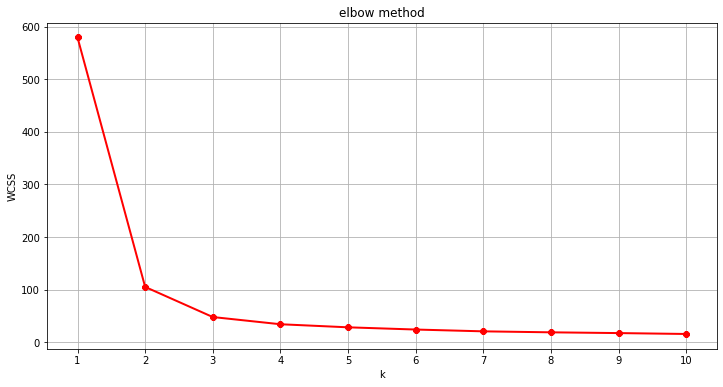

In [4]:
x = iris_df.iloc[:,[1,2,3]].values
plt.figure(figsize=(12,6))
plt.grid()
plt.xticks(np.arange(1,11,1))
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0,)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss,linewidth=2, color="red", marker ="8")
plt.title('elbow method')
plt.xlabel('k')
plt.ylabel('WCSS')

In [5]:
#Kmeans model
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [6]:
print(kmeans.cluster_centers_) 

[[3.00425532 5.6106383  2.04255319]
 [3.428      1.462      0.246     ]
 [2.75471698 4.28113208 1.3509434 ]]


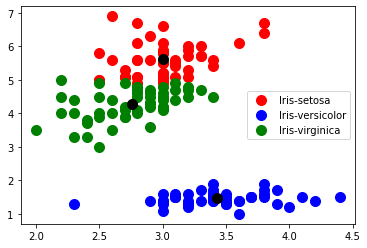

In [7]:
plt.scatter(x[y_kmeans   == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans   == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans   == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black',)
plt.legend()

In [8]:
iris_df["cluster"] = y_kmeans
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [9]:
x[y_kmeans   == 0,0]

array([3. , 2.7, 3.3, 2.7, 3. , 2.9, 3. , 3. , 2.9, 2.5, 3.6, 3.2, 2.7,
       3. , 2.5, 2.8, 3.2, 3. , 3.8, 2.6, 3.2, 2.8, 2.8, 3.3, 3.2, 3. ,
       2.8, 3. , 2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3.1, 3.1, 3.1,
       2.7, 3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])